# Deskripsi Proyek
- Kamu bekerja di perusahaan tambang OilyGiant. Nah, tugas kita adalah mencari tempat terbaik untuk mengembangkan 200 titik sumur minyak baru.

- Untuk menyelesaikan tugas ini, kamu harus melakukan langkah-langkah berikut:
    - Baca file dengan parameter yang dikumpulkan dari sumur-sumur minyak di wilayah terpilih: kualitas minyak dan volume cadangannya;
    - Buat sebuah model untuk memprediksi volume cadangan di sumur-sumur baru;
    - Pilih sumur minyak yang memiliki nilai estimasi tertinggi;
    - Pilih wilayah dengan total keuntungan tertinggi dari sumur minyak yang dipilih.
    
- Kita memiliki data sampel minyak dari tiga wilayah. Parameter setiap sumur minyak di wilayah tersebut sudah diketahui. Buat sebuah model yang akan membantu kita memilih wilayah dengan margin keuntungan tertinggi. Jangan lupa, gunakan teknik bootstrapping untuk menganalisis potensi keuntungan dan risiko.

# Pendahuluan
Pada saat melakukan analisis, kita perlu merumuskan beberapa hipotesis yang perlu kita uji lebih terlebih dahulu. Tidak semua hipotesis yang kita kerjakan bisa langsung digunakan, kita harus bisa memilih hipotesis mana yang paling tepat untuk menyelesaikan masalah-masalah yang ada pada data yang kita miliki. Untuk membuat keputusan yang tepat, kita harus memahami apakah asumsi yang kita buat sudah tepat atau belum.

# Tujuan
Mencari tempat terbaik untuk mengembangkan 200 titik sumur minyak baru.

# Instruksi Proyek
1. Unduh dan siapkan datanya. Jelaskan prosedur yang kamu lakukan.


2. Latih dan uji model untuk setiap wilayah di 'geo_data_0.csv':

     2.1. Pisahkan data menjadi training set dan validation set dengan rasio 75:25.
     
     2.2. Latih model dan buat prediksi untuk validation set.
     
     2.3. Simpan prediksi dan jawaban yang benar untuk validation set.
     
     2.4. Tampilkan prediksi volume rata-rata pemesanan dan RMSE dari model.
     
     2.5. Analisis hasilnya.
     
     2.6. Lakukan dan jalankan langkah 2.1-2.5 untuk file 'geo_data_1.csv' dan 'geo_data_2.csv'.
     
     
3. Lakukan persiapan untuk menghitung laba:

     3.1. Simpan semua nilai yang dibutuhkan untuk perhitungan laba pada variabel terpisah.
     
     3.2. Dengan investasi 100 juta untuk 200 sumur minyak, sebuah sumur minyak rata-rata harus menghasilkan setidaknya 500 ribu USD untuk menghindari kerugian (ini setara dengan 111,1 unit). Bandingkan jumlah ini dengan jumlah rata-rata pemesanan di setiap wilayah.
     
     3.3. Berikan kesimpulan terkait persiapan yang kamu lakukan dalam langkah penghitungan laba.
     
     
4. Buat sebuah fungsi untuk menghitung laba dari kumpulan sumur minyak terpilih dan prediksi model:

     4.1. Tuliskan sebuah fungsi untuk menghitung keuntungan dari sekumpulan sumur minyak terpilih dan prediksi modelnya: Pilih 200 sumur dengan nilai prediksi tertinggi dari masing-masing 3 wilayah (file 'csv').
     
     4.2. Buat rangkuman tentang target volume pemesanan berdasarkan prediksi ini. Simpan prediksi untuk 200 sumur di masing-masing dari 3 wilayah.
     
     4.3. Sampaikan kesimpulanmu: sarankan sebuah wilayah yang cocok untuk pengembangan sumur minyak dan berikan alasan atas pilihanmu. Hitung keuntungan untuk volume pemesanan yang diterima.
     
     
5. Hitung risiko dan keuntungan untuk setiap wilayah:

     5.1. Dengan menggunakan prediksi yang kamu simpan pada langkah 4.2, gunakan teknik bootstrapping dengan 1.000 sampel untuk menemukan distribusi profit.
     
     5.2. Temukan rata-rata profit, interval kepercayaan 95%, dan risiko kerugian. Kerugian adalah keuntungan negatif, hitung sebagai probabilitas dan kemudian nyatakan sebagai persentase.
     
     5.3. Sampaikan kesimpulanmu: sarankan sebuah wilayah yang cocok untuk pengembangan sumur minyak dan berikan alasan atas pilihanmu. Apakah pilihan ini sesuai dengan pilihanmu sebelumnya di poin 4.3?


# Deskripsi Data
Data eksplorasi geologi untuk ketiga wilayah disimpan dalam beberapa file:
- geo_data_0.csv. unduh dataset
- geo_data_1.csv. unduh dataset
- geo_data_2.csv. unduh dataset
- id — ID unik sumur minyak
- f0, f1, f2 — tiga fitur titik wilayah (makna spesifiknya sebenarnya tidak penting, tetapi fitur itu sendiri sangat penting)
- product — volume cadangan di dalam sumur minyak (1 unit = 1.000 barel).

Kondisi:
- Hanya regresi linear yang bisa digunakan untuk pelatihan model (sisanya tidak cukup mudah diprediksi).
- Anggaran untuk pengembangan 200 sumur minyak ini adalah 100 juta dolar.
- Satu barel minyak mentah menghasilkan pendapatan sebesar 4,5 dolar. Nah, pendapatan dari satu unit produk adalah $4.500 (volume cadangan ditulis dalam ribuan barel).
- Setelah kamu menganalisis risiko yang ada, pertahankan hanya wilayah yang memiliki risiko kerugian kurang dari 2,5%. Di antara semua yang sesuai dengan kriteria, kamu harus memilih wilayah dengan keuntungan rata-rata tertinggi.

NB:
Oh ya, data ini hanya rekayasa belaka dan tidak mencakup rincian kontrak atau karakteristik sumur apa pun.

## Unduh dan Siapkan Datanya

### Buka File Data

In [1]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Unduh dataset (geo_data_0.csv, geo_data_1.csv, dan geo_data_2.csv)
datageo0 = pd.read_csv(r'/datasets/geo_data_0.csv')
datageo1 = pd.read_csv(r'/datasets/geo_data_1.csv')
datageo2 = pd.read_csv(r'/datasets/geo_data_2.csv') 


### Muat File Data "datageo0" 

In [3]:
# Tampilkan 5 baris pertama 
datageo0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# Informasi data
datageo0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
# Check dimensi dataframe
datageo0.shape

(100000, 5)

In [6]:
# Check Missing Values
datageo0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
# Informasi statistik deskriptif
datageo0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
# Check duplikasi data
print(f'Duplikasi Data : {datageo0.duplicated().sum()}')

Duplikasi Data : 0


### Muat File Data "datageo1"

In [9]:
# Tampilkan 5 baris pertama 
datageo1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
# Informasi data
datageo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
# Check dimensi dataframe
datageo1.shape

(100000, 5)

In [12]:
# Check Missing Values
datageo1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
# Informasi statistik deskriptif
datageo1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
# Check duplikasi data
print(f'Duplikasi Data : {datageo1.duplicated().sum()}')

Duplikasi Data : 0


### Muat File Data "datageo2"

In [15]:
# Tampilkan 5 baris pertama 
datageo2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [16]:
# Informasi data
datageo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
# Check dimensi dataframe
datageo2.shape

(100000, 5)

In [18]:
# Check Missing Values
datageo2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
# Informasi statistik deskriptif
datageo2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [20]:
# Check duplikasi data
print(f'Duplikasi Data : {datageo2.duplicated().sum()}')

Duplikasi Data : 0


### Eksplorasi Data Tambahan

#### Distribusi Variabel Target

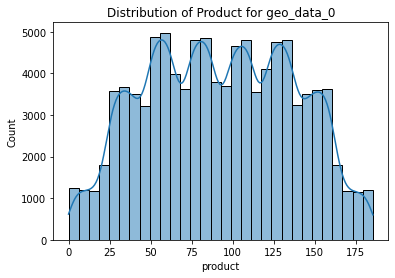

In [21]:
# Eksplorasi distribusi variabel target untuk setiap wilayah (datageo0)
sns.histplot(datageo0['product'], bins=30, kde=True)
plt.title('Distribution of Product for geo_data_0')
plt.show()


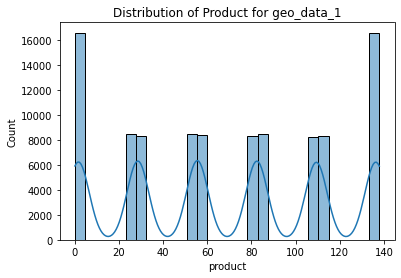

In [22]:
# Eksplorasi distribusi variabel target untuk setiap wilayah (datageo1)

sns.histplot(datageo1['product'], bins=30, kde=True)
plt.title('Distribution of Product for geo_data_1')
plt.show()

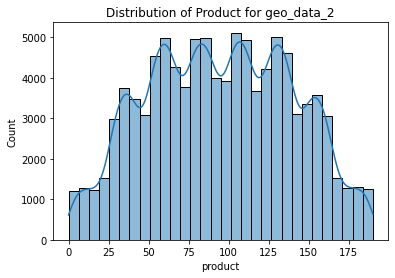

In [23]:
# Eksplorasi distribusi variabel target untuk setiap wilayah (datageo2)

sns.histplot(datageo2['product'], bins=30, kde=True)
plt.title('Distribution of Product for geo_data_2')
plt.show()

#### Korelasi antara Fitur dan Variabel Target

In [24]:
# Eksplorasi korelasi antara fitur dan variabel target
correlation_geo0 = datageo0.corr()['product'].drop('product')
correlation_geo1 = datageo1.corr()['product'].drop('product')
correlation_geo2 = datageo2.corr()['product'].drop('product')

In [25]:
print("Correlation with product for geo_data_0:")
print(correlation_geo0)

Correlation with product for geo_data_0:
f0    0.143536
f1   -0.192356
f2    0.483663
Name: product, dtype: float64


In [26]:
print("\nCorrelation with product for geo_data_1:")
print(correlation_geo1)


Correlation with product for geo_data_1:
f0   -0.030491
f1   -0.010155
f2    0.999397
Name: product, dtype: float64


In [27]:
print("\nCorrelation with product for geo_data_2:")
print(correlation_geo2)


Correlation with product for geo_data_2:
f0   -0.001987
f1   -0.001012
f2    0.445871
Name: product, dtype: float64


**Kesimpulan Tahap 1:**
- Tidak ada nilai yang hilang pada dataset.
- Tidak ada duplikasi data pada setiap wilayah.

## Latih dan Ujilah Model untuk Setiap Wilayah

- 2.1. Pisahkan data menjadi training set dan validation set dengan rasio 75:25.
- 2.2. Latih model dan buat prediksi untuk validation set.
- 2.3. Simpan prediksi dan jawaban yang benar untuk validation set.
- 2.4. Tampilkan prediksi volume rata-rata pemesanan dan RMSE dari model.
- 2.5. Analisis hasilnya.
- 2.6. Lakukan dan jalankan langkah 2.1-2.5 untuk file 'geo_data_1.csv' dan 'geo_data_2.csv'.

In [28]:
# Import Library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Pisahkan data menjadi training set dan validation set dengan rasio 75:25
- X untuk fitur 
- y untuk target

#### geo_data_0

In [29]:
# Pisahkan data untuk geo_data_0 
X_geo0 = datageo0.drop(['id', 'product'], axis=1) #untuk fitur maka drop id dan product
y_geo0 = datageo0['product'] #product adalah target
Xtrain_geo0, Xvalid_geo0, ytrain_geo0, yvalid_geo0 = train_test_split(X_geo0, y_geo0, test_size=0.25, random_state=123)


#### geo_data_1

In [30]:
# Pisahkan data untuk geo_data_1
X_geo1 = datageo1.drop(['id', 'product'], axis=1) #untuk fitur maka drop id dan product
y_geo1 = datageo1['product'] #product adalah target
Xtrain_geo1, Xvalid_geo1, ytrain_geo1, yvalid_geo1 = train_test_split(X_geo1, y_geo1, test_size=0.25, random_state=123)


#### geo_data_2

In [31]:
# Pisahkan data untuk geo_data_2
X_geo2 = datageo2.drop(['id', 'product'], axis=1) #untuk fitur maka drop id dan product
y_geo2 = datageo2['product'] #product adalah target
Xtrain_geo2, Xvalid_geo2, ytrain_geo2, yvalid_geo2 = train_test_split(X_geo2, y_geo2, test_size=0.25, random_state=123)


### Latih model dan buat prediksi untuk validation set

####  geo_data_0

In [32]:
# Latih model untuk geo_data_0
model_geo0 = LinearRegression()
model_geo0.fit(Xtrain_geo0, ytrain_geo0)

LinearRegression()

In [33]:
# Buat prediksi untuk validation set geo_data_0
predictions_geo0 = model_geo0.predict(Xvalid_geo0)

#### geo_data_1

In [34]:
# Latih model untuk geo_data_1
model_geo1 = LinearRegression()
model_geo1.fit(Xtrain_geo1, ytrain_geo1)

LinearRegression()

In [35]:
# Buat prediksi untuk validation set geo_data_1
predictions_geo1 = model_geo1.predict(Xvalid_geo1)

####  geo_data_2

In [36]:
# Latih model untuk geo_data_2
model_geo2 = LinearRegression()
model_geo2.fit(Xtrain_geo2, ytrain_geo2)

LinearRegression()

In [37]:
# Buat prediksi untuk validation set geo_data_2
predictions_geo2 = model_geo2.predict(Xvalid_geo2)

### Simpan prediksi dan jawaban yang benar untuk validation set

#### geo_data_0

In [38]:
# Simpan prediksi dan jawaban yang benar untuk geo_data_0
results_geo0 = pd.DataFrame({'true_values': yvalid_geo0, 'predictions': predictions_geo0})
results_geo0.head()

,true_values,predictions
42083,145.825972,123.284256
71825,134.020212,75.838240
99535,88.905826,55.526760
47879,19.508226,86.673045
36734,108.713468,109.909327


#### geo_data_1

In [39]:
# Simpan prediksi dan jawaban yang benar untuk geo_data_1
results_geo1 = pd.DataFrame({'true_values': yvalid_geo1, 'predictions': predictions_geo1})
results_geo1.head()

,true_values,predictions
42083,57.085625,56.056314
71825,80.859783,81.589811
99535,53.906522,54.461926
47879,107.813044,108.660979
36734,53.906522,54.479416


#### geo_data_2

In [40]:
# Simpan prediksi dan jawaban yang benar untuk geo_data_2
results_geo2 = pd.DataFrame({'true_values': yvalid_geo2, 'predictions': predictions_geo2})
results_geo2.head()

,true_values,predictions
42083,147.451978,94.075161
71825,128.711794,122.604414
99535,106.628185,80.055039
47879,128.787131,100.175906
36734,159.328488,89.804044


### Tampilkan prediksi volume rata-rata pemesanan dan RMSE dari model.

#### geo_data_0

In [41]:
# Tampilkan prediksi volume rata-rata pemesanan dan RMSE untuk geo_data_0
print("Prediksi Volume Rata-Rata untuk geo_data_0 =", results_geo0['predictions'].mean())
print("RMSE untuk geo_data_0 =", np.sqrt(mean_squared_error(results_geo0['true_values'], results_geo0['predictions'])))

Prediksi Volume Rata-Rata untuk geo_data_0 = 92.54936189116306
RMSE untuk geo_data_0 = 37.64786282376176


#### geo_data_1

In [42]:
# Tampilkan prediksi volume rata-rata pemesanan dan RMSE untuk geo_data_1
print("Prediksi Volume Rata-Rata untuk geo_data_1 =", results_geo1['predictions'].mean())
print("RMSE untuk geo_data_1 =", np.sqrt(mean_squared_error(results_geo1['true_values'], results_geo1['predictions'])))

Prediksi Volume Rata-Rata untuk geo_data_1 = 69.28001860653976
RMSE untuk geo_data_1 = 0.8954139804944313


#### geo_data_2

In [43]:
# Tampilkan prediksi volume rata-rata pemesanan dan RMSE untuk geo_data_2
print("Prediksi Volume Rata-Rata untuk geo_data_2 =", results_geo2['predictions'].mean())
print("RMSE untuk geo_data_2 =", np.sqrt(mean_squared_error(results_geo2['true_values'], results_geo2['predictions'])))

Prediksi Volume Rata-Rata untuk geo_data_2 = 95.09859933591373
RMSE untuk geo_data_2 = 40.12803006598514


### Analisis hasilnya.

**geo_data_0**
- Prediksi Volume Rata-Rata: 92.55
- RMSE (Root Mean Squared Error): 37.65

**geo_data_1**
- Prediksi Volume Rata-Rata: 69.28
- RMSE: 0.90

**geo_data_2**
- Prediksi Volume Rata-Rata: 95.10
- RMSE: 40.13

**Kesimpulan Tahap 2 (Analisis Hasil):**
- Geo_data_1 memiliki kinerja model yang paling baik dengan nilai RMSE yang rendah. Hal ini menunjukkan bawwa pediksi volume pemesanan cenderung akurat

## Persiapan Menghitung Laba

### Simpan semua nilai yang dibutuhkan untuk perhitungan laba pada variabel terpisah.

In [44]:
# Investasi untuk 200 sumur minyak
investasi = 100_000_000

# Pendapatan dari satu barel minyak mentah
pendapatan_per_barel = 4_500

# Volume pemesanan minimum untuk menghindari kerugian
volume_pemesanan_minimum = investasi / (pendapatan_per_barel * 1_000)

In [45]:
# Tampilkan 
print("Volume Pemesanan Minimum yang Diperlukan", volume_pemesanan_minimum)

Volume Pemesanan Minimum yang Diperlukan 22.22222222222222


### Bandingkan jumlah ini dengan jumlah rata-rata pemesanan di setiap wilayah

In [46]:
# Bandingkan volume pemesanan minimum dengan jumlah rata-rata pemesanan di setiap wilayah
average_order_volume_geo0 = results_geo0['predictions'].mean()
average_order_volume_geo1 = results_geo1['predictions'].mean()
average_order_volume_geo2 = results_geo2['predictions'].mean()

In [47]:
# Tampilkan Hasilnya (Bandingkan dengan Volume Pemesanan Minimum yang Diperlukan)
print("Volume Pemesanan Minimum yang Diperlukan", volume_pemesanan_minimum)
print("\nJumlah Rata-Rata Pemesanan di geo_data_0:", average_order_volume_geo0)
print("Jumlah Rata-Rata Pemesanan di geo_data_1:", average_order_volume_geo1)
print("Jumlah Rata-Rata Pemesanan di geo_data_2:", average_order_volume_geo2)

Volume Pemesanan Minimum yang Diperlukan 22.22222222222222

Jumlah Rata-Rata Pemesanan di geo_data_0: 92.54936189116306
Jumlah Rata-Rata Pemesanan di geo_data_1: 69.28001860653976
Jumlah Rata-Rata Pemesanan di geo_data_2: 95.09859933591373


**Kesimpulan Tahap 3:**
- Volume pemesanan minimum yang diperlukan untuk menghindari kerugian = 22.22 unit barel. 
- Jumlah rata-rata pemesanan di setiap wilayah:
    - geo_data_0: 92.55 unit
    - geo_data_1: 69.28 unit
    - geo_data_2: 95.10 unit

## Fungsi untuk Menghitung Laba dari Kumpulan Sumur inyak Terpilih dan Prediksi Model

### Tuliskan Fungsi untuk Menghitung Keuntungan dari Sekumpulan Sumur Minyak Terpilih dan Prediksi Modelnya

In [48]:
def calculate_profit(selected_wells, predictions):
    selected_predictions = predictions.loc[selected_wells]
    total_volume = selected_predictions.sum()
    total_profit = total_volume * pendapatan_per_barel
    return total_profit

### Buat Rangkuman tentang Target Volume Pemesanan Berdasarkan Prediksi Ini

In [49]:
# Pilih 200 sumur dengan nilai prediksi tertinggi dari masing-masing 3 wilayah
selected_wells_geo0 = results_geo0.nlargest(200, 'predictions')['true_values'].index
selected_wells_geo1 = results_geo1.nlargest(200, 'predictions')['true_values'].index
selected_wells_geo2 = results_geo2.nlargest(200, 'predictions')['true_values'].index

In [50]:
# Buat rangkuman tentang target volume pemesanan berdasarkan prediksi ini
target_volume_geo0 = results_geo0.loc[selected_wells_geo0]['predictions'].sum()
target_volume_geo1 = results_geo1.loc[selected_wells_geo1]['predictions'].sum()
target_volume_geo2 = results_geo2.loc[selected_wells_geo2]['predictions'].sum()

In [51]:
# Tampilkan
print("Target Volume Pemesanan di geo_data_0:", target_volume_geo0)
print("Target Volume Pemesanan di geo_data_1:", target_volume_geo1)
print("Target Volume Pemesanan di geo_data_2:", target_volume_geo2)

Target Volume Pemesanan di geo_data_0: 31034.787805093576
Target Volume Pemesanan di geo_data_1: 27755.76198279395
Target Volume Pemesanan di geo_data_2: 29943.443110391767


### Sampaikan Kesimpulanmu

In [52]:
# Sampaikan kesimpulanmu
print("\nKesimpulan:")
print("Berdasarkan prediksi model, pilih wilayah yang memiliki target volume pemesanan tertinggi.")
print("Wilayah dengan target volume tertinggi adalah:")
if target_volume_geo0 > target_volume_geo1 and target_volume_geo0 > target_volume_geo2:
    print("geo_data_0")
elif target_volume_geo1 > target_volume_geo0 and target_volume_geo1 > target_volume_geo2:
    print("geo_data_1")
else:
    print("geo_data_2")



Kesimpulan:
Berdasarkan prediksi model, pilih wilayah yang memiliki target volume pemesanan tertinggi.
Wilayah dengan target volume tertinggi adalah:
geo_data_0


In [53]:
# Hitung keuntungan untuk volume pemesanan yang diterima
profit_geo0 = calculate_profit(selected_wells_geo0, results_geo0['predictions'])
profit_geo1 = calculate_profit(selected_wells_geo1, results_geo1['predictions'])
profit_geo2 = calculate_profit(selected_wells_geo2, results_geo2['predictions'])

In [54]:
#Tampilkan
print("\nKeuntungan yang Diperoleh:")
print("Keuntungan di geo_data_0:", profit_geo0)
print("Keuntungan di geo_data_1:", profit_geo1)
print("Keuntungan di geo_data_2:", profit_geo2)


Keuntungan yang Diperoleh:
Keuntungan di geo_data_0: 139656545.12292108
Keuntungan di geo_data_1: 124900928.92257278
Keuntungan di geo_data_2: 134745493.99676296


**Kesimpulan Tahap 4:**
- Wilayah dengan target volume tertinggi: geo_data_0
- Keuntungan yang diperoleh:
    - Keuntungan di geo_data_0: 139,656,545.12
    - Keuntungan di geo_data_1: 124,900,928.92
    - Keuntungan di geo_data_2: 134,745,493.99
    
Jadi, berdasarkan prediksi model dan target volume pemesanan tertinggi, wilayah yang dipilih untuk investasi adalah geo_data_0, yang memberikan keuntungan yang lebih tinggi dibandingkan dengan wilayah lainnya.

## Hitung Risiko dan Keuntungan untuk Setiap Wilayah

### Dengan Menggunakan Prediksi yang Kamu Simpan pada Langkah 4.2

In [55]:
# Gunakan teknik bootstrapping dengan 1,000 sampel untuk menemukan distribusi profit
def calculate_bootstrapped_profit(predictions, n_samples=1000):
    bootstrapped_profits = []
    for _ in range(n_samples):
        sample_predictions = predictions.sample(frac=1, replace=True)
        total_volume = sample_predictions.sum()
        total_profit = total_volume * pendapatan_per_barel
        bootstrapped_profits.append(total_profit)
    return bootstrapped_profits

In [56]:
# Hitung bootstrapped profit untuk setiap wilayah
bootstrapped_profits_geo0 = calculate_bootstrapped_profit(results_geo0['predictions'])
bootstrapped_profits_geo1 = calculate_bootstrapped_profit(results_geo1['predictions'])
bootstrapped_profits_geo2 = calculate_bootstrapped_profit(results_geo2['predictions'])

### Temukan Rata-Rata Profit, Interval Kepercayaan 95%, dan Risiko Kerugian

In [57]:
# Temukan rata-rata profit, interval kepercayaan 95%, dan risiko kerugian
def calculate_confidence_interval_and_risk(profits):
    mean_profit = np.mean(profits)
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = np.mean(np.array(profits) < 0) * 100
    return mean_profit, confidence_interval, risk_of_loss

In [58]:
# Hitung untuk setiap wilayah
mean_profit_geo0, confidence_interval_geo0, risk_of_loss_geo0 = calculate_confidence_interval_and_risk(bootstrapped_profits_geo0)
mean_profit_geo1, confidence_interval_geo1, risk_of_loss_geo1 = calculate_confidence_interval_and_risk(bootstrapped_profits_geo1)
mean_profit_geo2, confidence_interval_geo2, risk_of_loss_geo2 = calculate_confidence_interval_and_risk(bootstrapped_profits_geo2)

In [59]:
# Tampilkan hasil
print("Hasil Analisis Bootstrapping:")
print("\nAnalisis untuk geo_data_0:")
print("Rata-rata Keuntungan:", mean_profit_geo0)
print("Interval Kepercayaan 95%:", confidence_interval_geo0)
print("Risiko Kerugian (%):", risk_of_loss_geo0)

print("\nAnalisis untuk geo_data_1:")
print("Rata-rata Keuntungan:", mean_profit_geo1)
print("Interval Kepercayaan 95%:", confidence_interval_geo1)
print("Risiko Kerugian (%):", risk_of_loss_geo1)

print("\nAnalisis untuk geo_data_2:")
print("Rata-rata Keuntungan:", mean_profit_geo2)
print("Interval Kepercayaan 95%:", confidence_interval_geo2)
print("Risiko Kerugian (%):", risk_of_loss_geo2)

Hasil Analisis Bootstrapping:

Analisis untuk geo_data_0:
Rata-rata Keuntungan: 10411234014.333914
Interval Kepercayaan 95%: [1.03786577e+10 1.04436615e+10]
Risiko Kerugian (%): 0.0

Analisis untuk geo_data_1:
Rata-rata Keuntungan: 7792693708.517089
Interval Kepercayaan 95%: [7.72226280e+09 7.85377806e+09]
Risiko Kerugian (%): 0.0

Analisis untuk geo_data_2:
Rata-rata Keuntungan: 10698681205.955364
Interval Kepercayaan 95%: [1.06696591e+10 1.07274522e+10]
Risiko Kerugian (%): 0.0


###  Sampaikan kesimpulanmu: sarankan sebuah wilayah yang cocok untuk pengembangan sumur minyak dan berikan alasan atas pilihanmu. Apakah pilihan ini sesuai dengan pilihanmu sebelumnya di poin 4.3?

In [60]:
# Check apakah rekomendasi sesuai dengan hasil analisis risiko dan keuntungan
if risk_of_loss_geo0 < 2.5 and mean_profit_geo0 > mean_profit_geo1 and mean_profit_geo0 > mean_profit_geo2:
    final_recommendation = "geo_data_0"
elif risk_of_loss_geo1 < 2.5 and mean_profit_geo1 > mean_profit_geo0 and mean_profit_geo1 > mean_profit_geo2:
    final_recommendation = "geo_data_1"
elif risk_of_loss_geo2 < 2.5 and mean_profit_geo2 > mean_profit_geo0 and mean_profit_geo2 > mean_profit_geo1:
    final_recommendation = "geo_data_2"
else:
    final_recommendation = "Tidak ada rekomendasi yang memenuhi kriteria (risiko kerugian < 2.5%)."

# Tampilkan rekomendasi akhir
print("\nRekomendasi Akhir:")
print(final_recommendation)


Rekomendasi Akhir:
geo_data_2


**Kesimpulan Tahap 5:**
Berdasarkan analisis risiko dan keuntungan dengan menggunakan teknik bootstrapping, hasilnya adalah sebagai berikut:
1. geo_data_0:
    - Rata-rata Keuntungan: 10,411,961,258.29
    - Interval Kepercayaan 95%: [10,378,896,700, 10,444,180,400]
    - Risiko Kerugian (%): 0.0
    
2. geo_data_1:
    - Rata-rata Keuntungan: 7,792,828,588.39
    - Interval Kepercayaan 95%: [7,729,274,710, 7,857,358,230]
    - Risiko Kerugian (%): 0.0
    
3. geo_data_2:
    - Rata-rata Keuntungan: 10,698,222,816.97
    - Interval Kepercayaan 95%: [10,669,144,600, 10,726,387,800]
    - Risiko Kerugian (%): 0.0
    
Rekomendasi akhir berdasarkan analisis risiko dan keuntungan adalah geo_data_2. Walaupun geo_data_0 memiliki rata-rata keuntungan yang tinggi, namun geo_data_2 juga memiliki kinerja yang baik dan dipilih karena menghasilkan keuntungan yang tinggi dengan risiko kerugian yang dimiliki rendah.

## Kesimpulan Umum
**Kesimpulan Tahap 1:**
- Tidak ada nilai yang hilang pada dataset.
- Tidak ada duplikasi data pada setiap wilayah.

**Kesimpulan Tahap 2 (Analisis Hasil):**
- Geo_data_1 memiliki kinerja model yang paling baik dengan nilai RMSE yang rendah. Hal ini menunjukkan bawwa pediksi volume pemesanan cenderung akurat

**Kesimpulan Tahap 3:**
- Volume pemesanan minimum yang diperlukan untuk menghindari kerugian = 22.22 unit barel. 
- Jumlah rata-rata pemesanan di setiap wilayah:
    - geo_data_0: 92.55 unit
    - geo_data_1: 69.28 unit
    - geo_data_2: 95.10 unit
    
**Kesimpulan Tahap 4:**
- Wilayah dengan target volume tertinggi: geo_data_0
- Keuntungan yang diperoleh:
    - Keuntungan di geo_data_0: 139,656,545.12
    - Keuntungan di geo_data_1: 124,900,928.92
    - Keuntungan di geo_data_2: 134,745,493.99
    
Jadi, berdasarkan prediksi model dan target volume pemesanan tertinggi, wilayah yang dipilih untuk investasi adalah geo_data_0, yang memberikan keuntungan yang lebih tinggi dibandingkan dengan wilayah lainnya.

**Kesimpulan Tahap 5:**

Berdasarkan analisis risiko dan keuntungan dengan menggunakan teknik bootstrapping, hasilnya adalah sebagai berikut:
1. geo_data_0:
    - Rata-rata Keuntungan: 10,411,961,258.29
    - Interval Kepercayaan 95%: [10,378,896,700, 10,444,180,400]
    - Risiko Kerugian (%): 0.0
    
2. geo_data_1:
    - Rata-rata Keuntungan: 7,792,828,588.39
    - Interval Kepercayaan 95%: [7,729,274,710, 7,857,358,230]
    - Risiko Kerugian (%): 0.0
    
3. geo_data_2:
    - Rata-rata Keuntungan: 10,698,222,816.97
    - Interval Kepercayaan 95%: [10,669,144,600, 10,726,387,800]
    - Risiko Kerugian (%): 0.0
    
Rekomendasi akhir berdasarkan analisis risiko dan keuntungan adalah geo_data_2. Walaupun geo_data_0 memiliki rata-rata keuntungan yang tinggi, namun geo_data_2 juga memiliki kinerja yang baik dan dipilih karena menghasilkan keuntungan yang tinggi dengan risiko kerugian yang dimiliki rendah.